# Bonus: Temperature Analysis I

In [65]:
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
import numpy as np

In [49]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [50]:
# Convert the date column format from string to datetime
df['date'] = pd.to_datetime(df['date'])
# Set the date column as the DataFrame index
df.set_index('date')

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


### Compare June and December data across all years 

In [70]:
# Identify the average temperature for June
June_temp = df[df.date.dt.month == 6]
June_avg = df[df.date.dt.month == 6].agg({'tobs': 'mean'})
print(June_avg.tobs)

74.94411764705882


In [71]:
# Identify the average temperature for December
Dec_temp = df[df.date.dt.month == 12]
Dec_avg = df[df.date.dt.month == 12].agg({'tobs': 'mean'})
print(Dec_avg.tobs)

71.04152933421226


In [124]:
# Create collections of temperature data
December = Dec_temp["tobs"]
June = June_temp["tobs"]
print(f'December temperature: minimum = {min(December)} maximum = {max(December)}')
print(f'June temperature:     minimum = {min(June)} maximum = {max(June)}')

December temperature: minimum = 56 maximum = 83
June temperature:     minimum = 64 maximum = 85


In [114]:
#find variance for each group
print(np.var(December), np.var(June))
print(np.var(December)- np.var(June))

14.022665558302293 10.604524221453236
3.4181413368490574


In [115]:
# Run ind t-test
stats.ttest_ind(June, December)

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

<AxesSubplot:xlabel='tobs', ylabel='Count'>

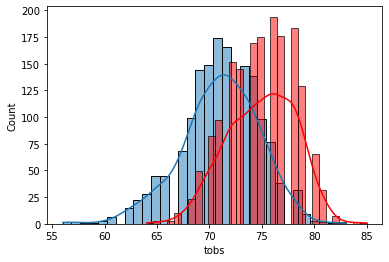

In [116]:
sns.histplot(December, kde=True)
sns.histplot(June, color='red', kde=True)

In [125]:
# Create collections of temperature data
December = Dec_temp["tobs"].head(1500)
June = June_temp["tobs"].head(1500)
print(f'December temperature: minimum = {min(December)} maximum = {max(December)}')
print(f'June temperature:     minimum = {min(June)} maximum = {max(June)}')

December temperature: minimum = 56 maximum = 83
June temperature:     minimum = 64 maximum = 85


In [126]:
#find variance for each group
print(np.var(December), np.var(June))
print(np.var(December)- np.var(June))

13.98281599999998 9.830788888888902
4.152027111111078


In [130]:
# Run paired t-test
stats.ttest_rel(June, December)

Ttest_relResult(statistic=34.69833028869736, pvalue=3.864098966773339e-194)

<AxesSubplot:xlabel='tobs', ylabel='Count'>

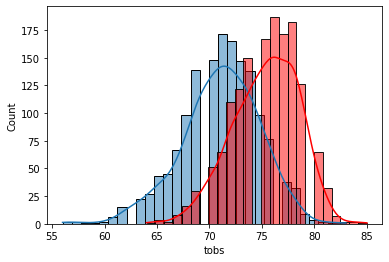

In [128]:
sns.histplot(December, kde=True)
sns.histplot(June, color='red', kde=True)

### Analysis

The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (3.864098966773339e-194) is less than alpha = 0.05, we fail to reject the null hypothesis of the test.

Turns out the weather in Hawaii always rocks! You should definitely go!